## Startup analysis

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot 

def get_acquisitions():
    return pd.read_csv("data/acquisitions.csv", sep=",")
def get_degrees():
    return pd.read_csv("data/degrees.csv", sep=",")
def get_funding_rounds():
    return pd.read_csv("data/funding_rounds.csv", sep=",")
def get_funds():
    return pd.read_csv("data/funds.csv", sep=",")
def get_investments():
    return pd.read_csv("data/investments.csv", sep=",")
def get_ipos():
    return pd.read_csv("data/ipos.csv", sep=",")
def get_milestones():
    return pd.read_csv("data/milestones.csv", sep=",")
def get_objects():
    return pd.read_csv("data/objects.csv", sep=",", low_memory=False)
def get_offices():
    return pd.read_csv("data/offices.csv", sep=",")
def get_people():
    return pd.read_csv("data/people.csv", sep=",")
def get_relationships():
    return pd.read_csv("data/relationships.csv", sep=",")

# TODO: write import functions for other files
investments = get_investments()
acquistions = get_acquisitions()
degrees = get_degrees()
funding_rounds = get_funding_rounds()
funds = get_funds()
ipos = get_ipos()
milestones = get_milestones()
objects = get_objects()
offices = get_offices()
people = get_people()
relationships = get_relationships()
companies = objects[objects["entity_type"] == "Company"]


<BarContainer object of 10 artists>

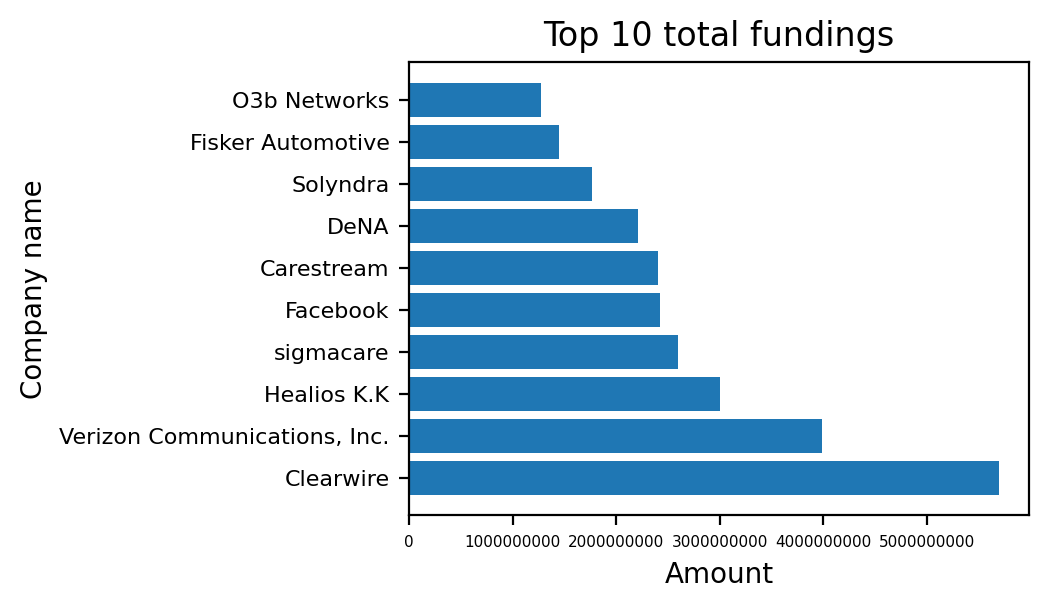

In [4]:
from matplotlib import pyplot 
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings = total_fundings.merge(companies, left_on="object_id", right_on="id")[["name", "object_id", "raised_amount", "status"]]
total_fundings
fig, axes = pyplot.subplots(figsize=(4, 3), dpi=200)
axes.ticklabel_format(style='plain')
pyplot.xticks(fontsize=5.5)
pyplot.yticks(fontsize=8)
axes.set_title("Top 10 total fundings")
pyplot.xlabel("Amount")
pyplot.ylabel("Company name")
axes.barh(total_fundings["name"][:10], total_fundings["raised_amount"][:10])


<BarContainer object of 42 artists>

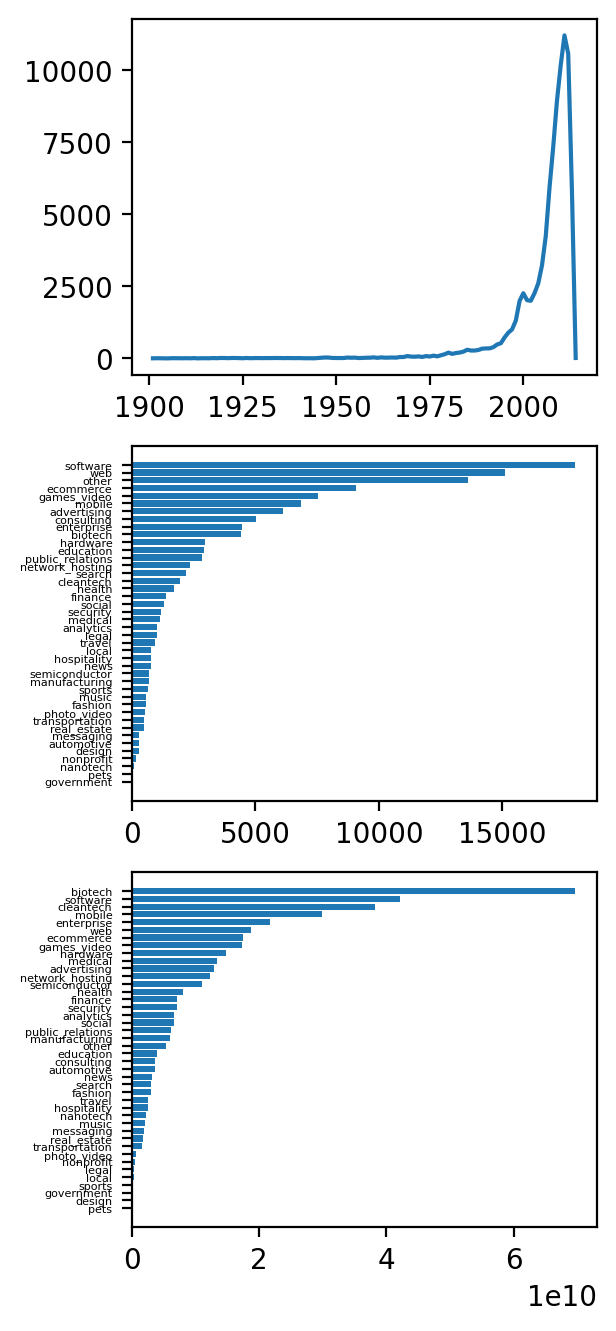

In [5]:
#Grafi: število podjetji ustvarjenih po letih, št. podjetji v vsaki inudstriji, skupna vstoa investicij v vsako industrijo
from datetime import datetime
founded_years = pd.DataFrame([datetime.strptime(str(date), '%Y-%m-%d').year for date in companies["founded_at"] if str(date) != "nan"])
count_by_year = founded_years.groupby(0).size()
count_by_category = objects.groupby("category_code").size().sort_values()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings_per_category = total_fundings.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").sum()["raised_amount"].sort_values()
fig, axes = pyplot.subplots(3, 1, figsize=(3, 8), dpi=200)
axes[1].tick_params(axis="y", labelsize=4)
axes[1].ticklabel_format(style='plain')
axes[2].tick_params(axis="y", labelsize=4)
axes[0].plot(count_by_year.index, count_by_year.values)
axes[1].barh(count_by_category.index, count_by_category.values)
axes[2].barh(total_fundings_per_category.index, total_fundings_per_category.values)

,mean_amount,count
mean_amount,1.00000,-0.18162
count,-0.18162,1.00000


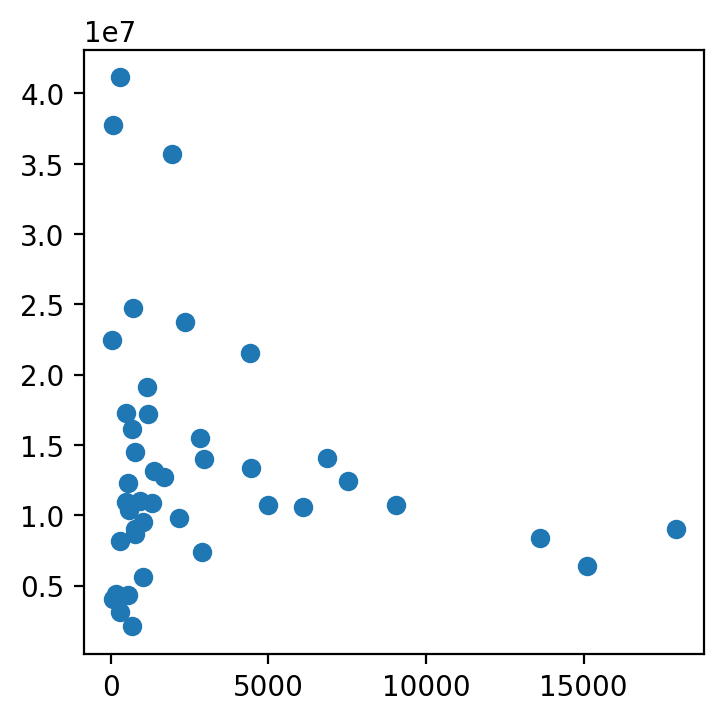

In [6]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in povprečno investicijo v podjetje.
count_by_category = objects.groupby("category_code").size()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
mean_fundings_per_category = total_fundings.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").mean()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(mean_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(mean_fundings_per_category.rename("mean_amount"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_amount"])
cor = merged.corr()
cor

,mean_amount,count
mean_amount,1.000000,0.499594
count,0.499594,1.000000


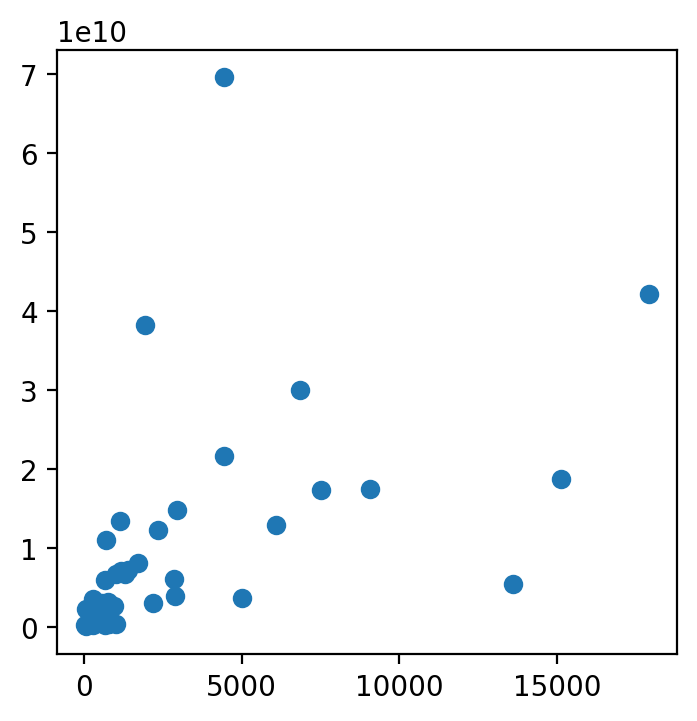

In [7]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in skupno vsoto investicij v to industrijo.
count_by_category = objects.groupby("category_code").size()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings_per_category = total_fundings.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").sum()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(total_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(total_fundings_per_category.rename("mean_amount"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_amount"])
cor = merged.corr()
cor

,mean_investitons,count
mean_investitons,1.000000,-0.127317
count,-0.127317,1.000000


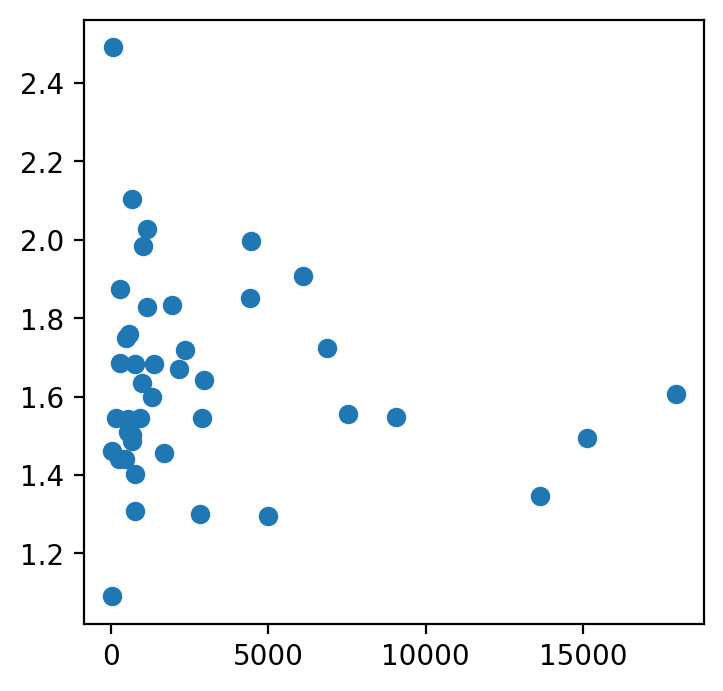

In [8]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in povprečnim številom investicij v to industrijo (ne vsoto investicij, dobesedno št. investicij)
count_by_category = objects.groupby("category_code").size()
num_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].count().sort_values("raised_amount", ascending=False)
num_fundings_per_category = num_fundings.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").mean()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(num_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(num_fundings_per_category.rename("mean_investitons"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_investitons"])
cor = merged.corr()
cor

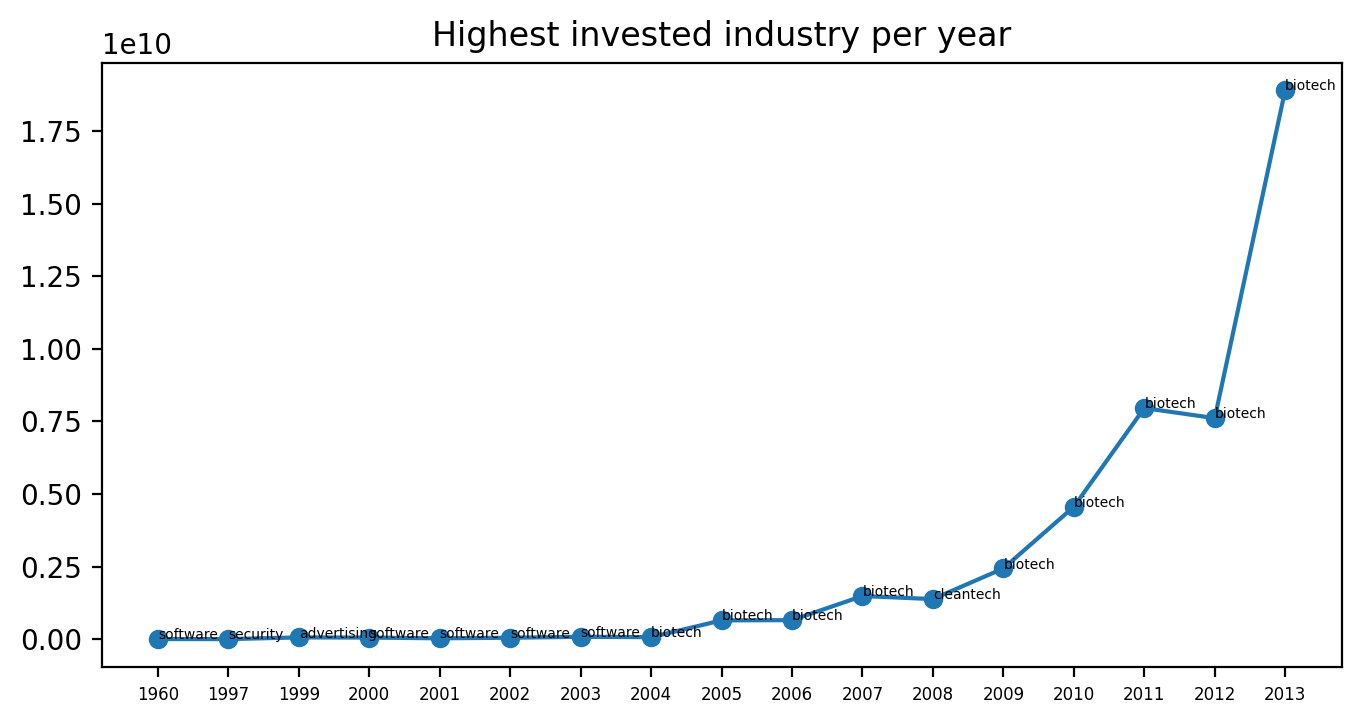

In [9]:
#Industrja z največjo investicijo vsako leto
from datetime import datetime
from matplotlib import pyplot
total_fundings_by_year = funding_rounds.copy()
total_fundings_by_year = total_fundings_by_year.dropna(axis=0)
total_fundings_by_year["funded_at"] = total_fundings_by_year["funded_at"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d").year)
total_fundings_by_year = total_fundings_by_year.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount", "funded_at"]].dropna()
max_fundings_in_year = total_fundings_by_year.groupby(["funded_at", "category_code"]).sum("raised_amount")
max_fundings_in_year =  max_fundings_in_year.reset_index().loc[max_fundings_in_year.reset_index().groupby("funded_at")["raised_amount"].idxmax()]
fig, axes = pyplot.subplots(figsize=(8, 4), dpi=200)
axes.tick_params(axis="x", labelsize=6)
axes.set_title("Highest invested industry per year")
line = axes.plot(max_fundings_in_year["funded_at"].apply(lambda x: str(x)), max_fundings_in_year["raised_amount"], marker='o')
line[0].get_xdata(orig=False)
for row in zip(max_fundings_in_year["category_code"], line[0].get_xdata(orig=False), line[0].get_ydata(orig=False)):
    axes.annotate(row[0], (row[1], row[2]), size=5)

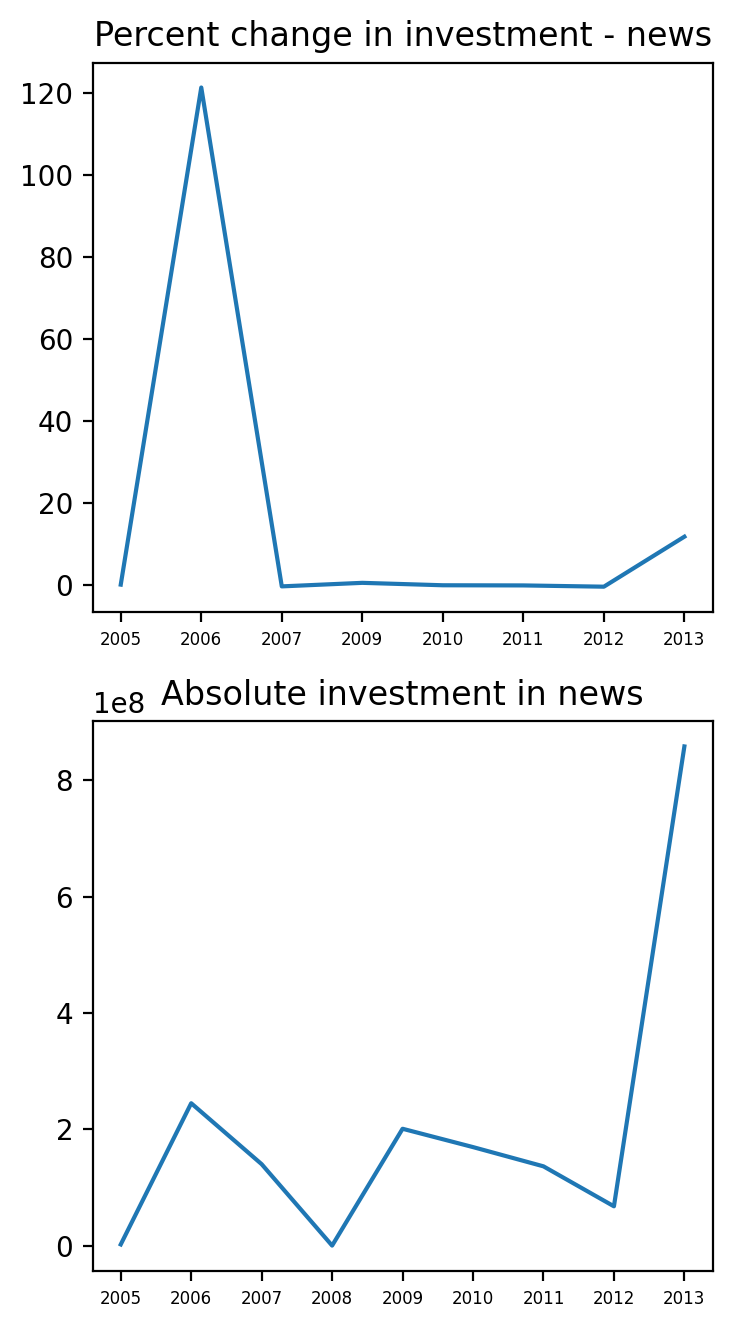

In [5]:
#Funkcije za pridobivanje letne vrednosti industrije: procentualno spremembeo, skupno letno vrednost
def get_investments_pct_changes(cat):
    total_fundings_by_year = funding_rounds.copy()
    total_fundings_by_year = total_fundings_by_year.dropna(axis=0)
    total_fundings_by_year["funded_at"] = total_fundings_by_year["funded_at"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d").year)
    total_fundings_by_year = total_fundings_by_year.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount", "funded_at"]].dropna()
    grouped = total_fundings_by_year.groupby(["category_code", "funded_at"]).sum("raised_amount")
    grouped = grouped.reset_index()
    cur = grouped[grouped["category_code"] == cat]
    cur = cur.groupby(["category_code", "funded_at"]).sum()
    cur = cur[cur["raised_amount"] > 0].pct_change().fillna(0)
    return cur.reset_index()
def get_category_yearly_investments(cat):
    total_fundings_by_year = funding_rounds.copy()
    total_fundings_by_year = total_fundings_by_year.dropna(axis=0)
    total_fundings_by_year["funded_at"] = total_fundings_by_year["funded_at"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d").year)
    total_fundings_by_year = total_fundings_by_year.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount", "funded_at"]].dropna()
    grouped = total_fundings_by_year.groupby(["category_code", "funded_at"]).sum("raised_amount")
    grouped = grouped.reset_index()[grouped.reset_index()["category_code"] == cat]
    return grouped
from matplotlib import pyplot
cat = "news"
chng = get_investments_pct_changes(cat) 
yearly = get_category_yearly_investments(cat)
fig, axes = pyplot.subplots(2, 1, figsize=(4, 8), dpi=200)
axes[0].set_title("Percent change in investment - " + cat)
axes[0].tick_params(axis="x", labelsize=6)
axes[0].plot(chng["funded_at"].apply(lambda x: str(x)), chng["raised_amount"])
axes[1].set_title("Absolute investment in " + cat)
axes[1].tick_params(axis="x", labelsize=6)
axes[1].plot(yearly["funded_at"].apply(lambda x: str(x)), yearly["raised_amount"])

In [6]:
means = pd.DataFrame(columns=["category_code", "mean"])
for cat in pd.unique(companies["category_code"].dropna()):
    pct = get_category_yearly_investments(cat).iloc[-5:]["raised_amount"].mean()
    df = pd.DataFrame({"category_code":cat, "mean":pct}, index=[0])
    means = pd.concat([means, df])
means

,category_code,mean
0,web,1187675482.2
0,games_video,804406938.6
0,network_hosting,644793178.4
0,advertising,834811861.4
0,cleantech,2496363174.0
0,enterprise,2217508312.2
0,other,506640321.6
0,consulting,143364357.0
0,mobile,2230973234.6
0,health,1287109710.4


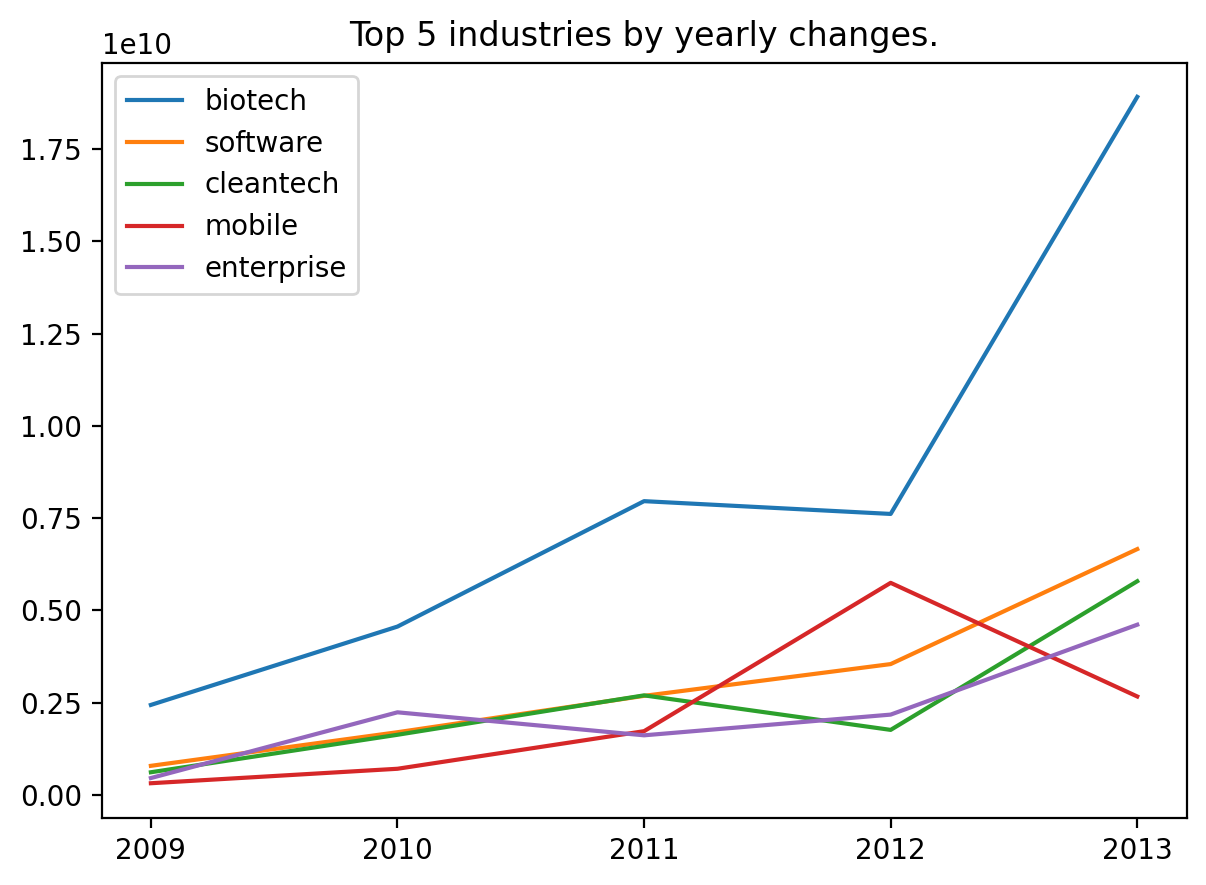

In [10]:
fig, axes = pyplot.subplots(figsize=(7, 5), dpi=200)
for _, mean in means.sort_values("mean", ascending=False).reset_index()[:5].iterrows():
    pct = get_category_yearly_investments(mean[1])[-5:]
    axes.plot(pct["funded_at"].apply(lambda x:str(x)), pct["raised_amount"], label=mean[1])
axes.set_title("Top 5 industries by yearly changes.")
axes.legend()

<BarContainer object of 10 artists>

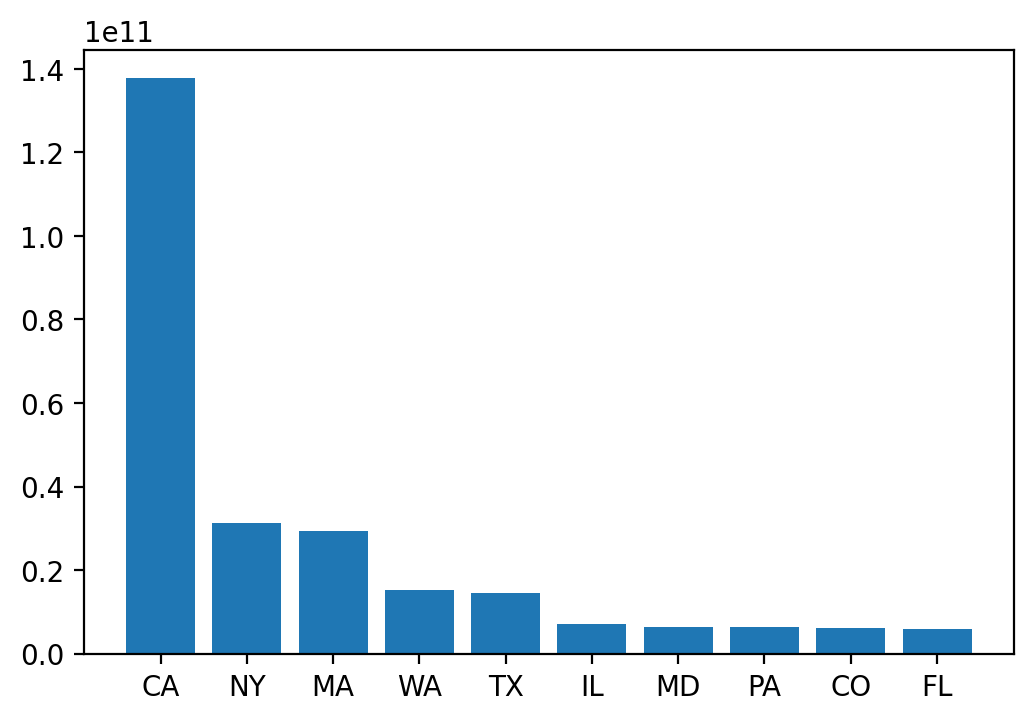

In [13]:
#Najboljše države za ustvariti podjetje?
funding_per_state = companies.groupby("state_code")["funding_total_usd"].sum().sort_values(ascending=False).dropna()
fig, axes = pyplot.subplots(figsize=(6, 4), dpi=200)
axes.bar(funding_per_state[:10].index, funding_per_state[:10].values)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


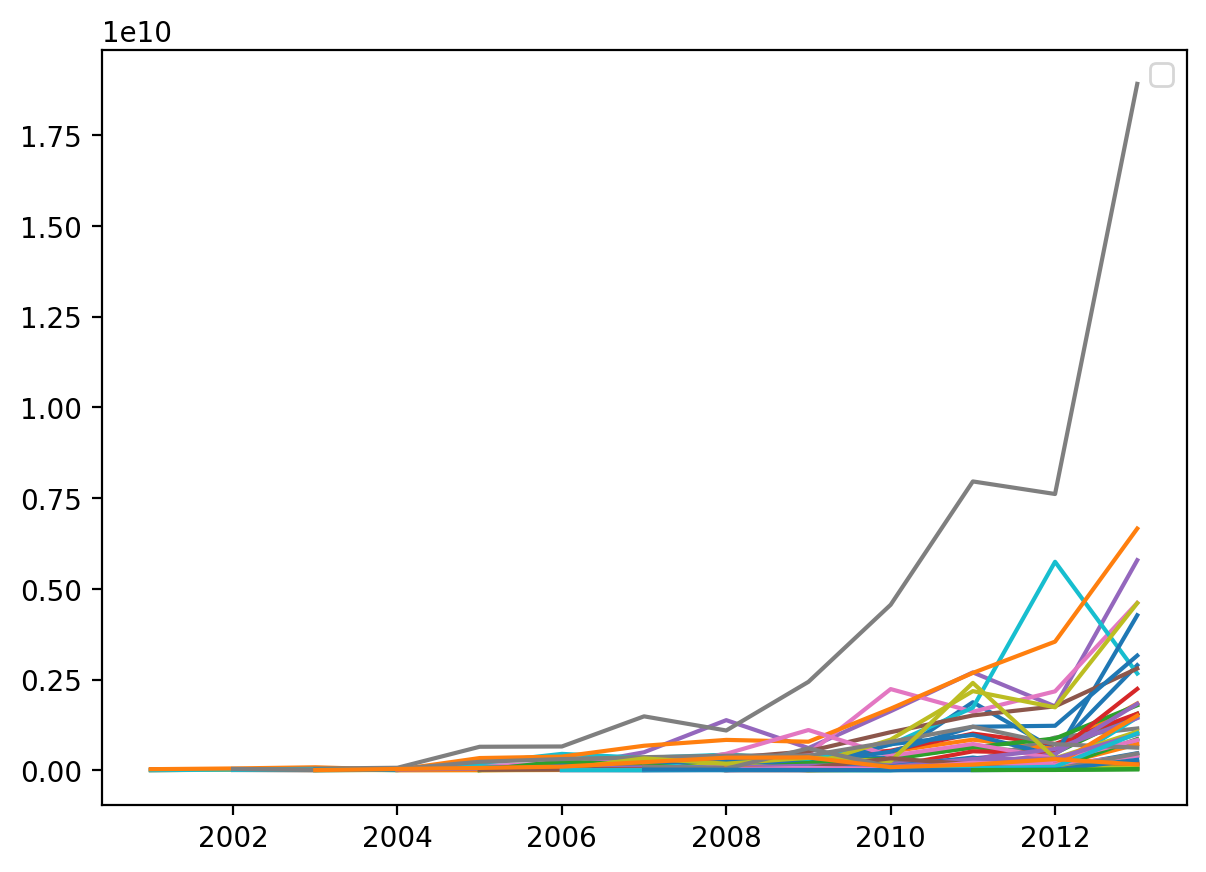

In [16]:
total_fundings_by_year = funding_rounds.copy()
total_fundings_by_year = total_fundings_by_year.dropna(axis=0)
total_fundings_by_year["funded_at"] = total_fundings_by_year["funded_at"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d").year)
total_fundings_by_year = total_fundings_by_year.merge(companies, left_on="object_id", right_on="id")[["category_code", "raised_amount", "funded_at"]].dropna()
grouped = total_fundings_by_year.groupby(["category_code", "funded_at"]).sum("raised_amount")
grouped = grouped.reset_index()
fig, axes = pyplot.subplots(figsize=(7, 5), dpi=200)
for cat in pd.unique(companies["category_code"]):
    cur = grouped[grouped["category_code"] == cat]
    axes.plot(cur[cur["funded_at"] > 2000]["funded_at"], cur[cur["funded_at"] > 2000]["raised_amount"])
axes.legend()

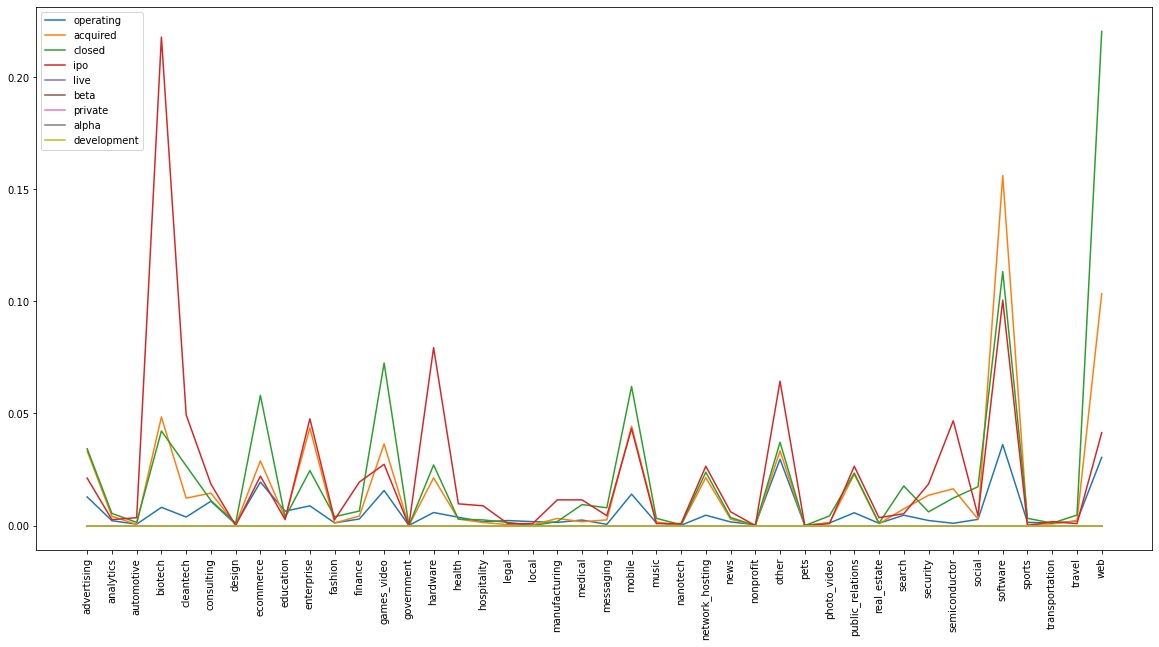

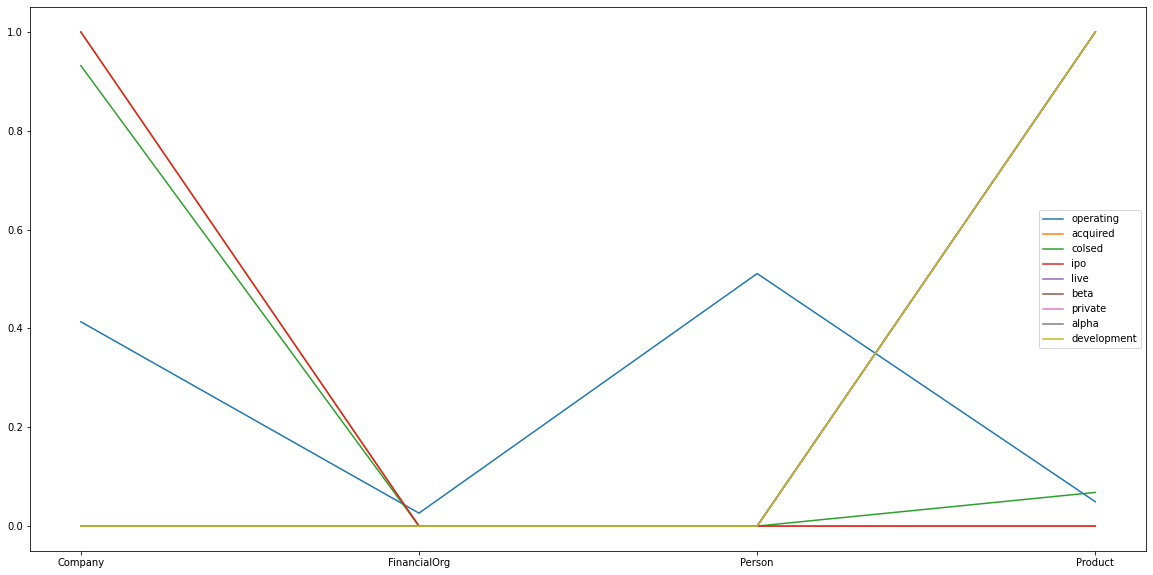

In [4]:
#split v tabele po statusih
objects_operating = objects[objects["status"] == "operating"]
objects_acquired = objects[objects["status"] == "acquired"]
objects_closed = objects[objects["status"] == "closed"]
objects_ipo = objects[objects["status"] == "ipo"]
objects_live = objects[objects["status"] == "live"]
objects_beta = objects[objects["status"] == "beta"]
objects_private = objects[objects["status"] == "private"]
objects_alpha = objects[objects["status"] == "alpha"]
objects_development = objects[objects["status"] == "development"]


status_values = objects["status"].unique()
entity_types = objects["entity_type"].unique()
category_types = objects["category_code"].dropna().unique()

#OPERATING --------------------------------------------------------------------------------------------------------------------

dictCategory_operating = dict()
arrKeys_category_operating = []
arrNum_category_operating = []
for category in category_types:
    if category in objects_operating["category_code"].unique():
        dictCategory_operating[category] = len(objects_operating[objects_operating["category_code"] == category])
    else:
        dictCategory_operating[category] = 0

for key in sorted(dictCategory_operating):
    arrKeys_category_operating.append(key)
    arrNum_category_operating.append(dictCategory_operating[key] / len(objects_operating["category_code"]))

dictType_operating = dict()
arrKeys_type_operating = []
arrNum_type_operating = []
for category in entity_types:
    if category in objects_operating["entity_type"].unique():
        dictType_operating[category] = len(objects_operating[objects_operating["entity_type"] == category])
    else:
         dictType_operating[category] = 0
    
for key in sorted(dictType_operating):
    arrKeys_type_operating.append(key)
    arrNum_type_operating.append(dictType_operating[key] / len(objects_operating["entity_type"]))

#AQUIRED --------------------------------------------------------------------------------------------------------------

dictCategory_acquired = dict()
arrKeys_category_acquired = []
arrNum_category_acquired = []
for category in category_types:
    if category in objects_acquired["category_code"].unique():
        dictCategory_acquired[category] = len(objects_acquired[objects_acquired["category_code"] == category])
    else:
        dictCategory_acquired[category] = 0

for key in sorted(dictCategory_acquired):
    arrKeys_category_acquired.append(key)
    arrNum_category_acquired.append(dictCategory_acquired[key] / len(objects_acquired["category_code"]))

dictType_acquired = dict()
arrKeys_type_acquired = []
arrNum_type_acquired = []
for category in entity_types:
    if category in objects_acquired["entity_type"].unique():
        dictType_acquired[category] = len(objects_acquired[objects_acquired["entity_type"] == category])
    else:
         dictType_acquired[category] = 0
    
for key in sorted(dictType_acquired):
    arrKeys_type_acquired.append(key)
    arrNum_type_acquired.append(dictType_acquired[key] / len(objects_acquired["entity_type"]))

#CLOSED --------------------------------------------------------------------------------------------------------------

dictCategory_closed = dict()
arrKeys_category_closed = []
arrNum_category_closed = []
for category in category_types:
    if category in objects_closed["category_code"].unique():
        dictCategory_closed[category] = len(objects_closed[objects_closed["category_code"] == category])
    else:
        dictCategory_closed[category] = 0

for key in sorted(dictCategory_closed):
    arrKeys_category_closed.append(key)
    arrNum_category_closed.append(dictCategory_closed[key] / len(objects_closed["category_code"]))

dictType_closed = dict()
arrKeys_type_closed = []
arrNum_type_closed = []
for category in entity_types:
    if category in objects_closed["entity_type"].unique():
        dictType_closed[category] = len(objects_closed[objects_closed["entity_type"] == category])
    else:
         dictType_closed[category] = 0
    
for key in sorted(dictType_closed):
    arrKeys_type_closed.append(key)
    arrNum_type_closed.append(dictType_closed[key] / len(objects_closed["entity_type"]))

#IPO --------------------------------------------------------------------------------------------------------------
dictCategory_ipo = dict()
arrKeys_category_ipo = []
arrNum_category_ipo = []
for category in category_types:
    if category in objects_ipo["category_code"].unique():
        dictCategory_ipo[category] = len(objects_ipo[objects_ipo["category_code"] == category])
    else:
        dictCategory_ipo[category] = 0

for key in sorted(dictCategory_ipo):
    arrKeys_category_ipo.append(key)
    arrNum_category_ipo.append(dictCategory_ipo[key] / len(objects_ipo["category_code"]))

dictType_ipo = dict()
arrKeys_type_ipo = []
arrNum_type_ipo = []
for category in entity_types:
    if category in objects_ipo["entity_type"].unique():
        dictType_ipo[category] = len(objects_ipo[objects_ipo["entity_type"] == category])
    else:
         dictType_ipo[category] = 0
    
for key in sorted(dictType_ipo):
    arrKeys_type_ipo.append(key)
    arrNum_type_ipo.append(dictType_ipo[key] / len(objects_ipo["entity_type"]))



#LIVE --------------------------------------------------------------------------------------------------------------
dictCategory_live = dict()
arrKeys_category_live = []
arrNum_category_live = []
for category in category_types:
    if category in objects_live["category_code"].unique():
        dictCategory_live[category] = len(objects_live[objects_live["category_code"] == category])
    else:
        dictCategory_live[category] = 0

for key in sorted(dictCategory_live):
    arrKeys_category_live.append(key)
    arrNum_category_live.append(dictCategory_live[key] / len(objects_live["category_code"]))

dictType_live = dict()
arrKeys_type_live = []
arrNum_type_live = []
for category in entity_types:
    if category in objects_live["entity_type"].unique():
        dictType_live[category] = len(objects_live[objects_live["entity_type"] == category])
    else:
         dictType_live[category] = 0
    
for key in sorted(dictType_live):
    arrKeys_type_live.append(key)
    arrNum_type_live.append(dictType_live[key] / len(objects_live["entity_type"]))

#BETA --------------------------------------------------------------------------------------------------------------
dictCategory_beta = dict()
arrKeys_category_beta = []
arrNum_category_beta = []
for category in category_types:
    if category in objects_beta["category_code"].unique():
        dictCategory_beta[category] = len(objects_beta[objects_beta["category_code"] == category])
    else:
        dictCategory_beta[category] = 0

for key in sorted(dictCategory_beta):
    arrKeys_category_beta.append(key)
    arrNum_category_beta.append(dictCategory_beta[key] / len(objects_beta["category_code"]))

dictType_beta = dict()
arrKeys_type_beta = []
arrNum_type_beta = []
for category in entity_types:
    if category in objects_beta["entity_type"].unique():
        dictType_beta[category] = len(objects_beta[objects_beta["entity_type"] == category])
    else:
         dictType_beta[category] = 0
    
for key in sorted(dictType_beta):
    arrKeys_type_beta.append(key)
    arrNum_type_beta.append(dictType_beta[key] / len(objects_beta["entity_type"]))

#PRIVATE --------------------------------------------------------------------------------------------------------------
dictCategory_private = dict()
arrKeys_category_private = []
arrNum_category_private = []
for category in category_types:
    if category in objects_private["category_code"].unique():
        dictCategory_private[category] = len(objects_private[objects_private["category_code"] == category])
    else:
        dictCategory_private[category] = 0

for key in sorted(dictCategory_private):
    arrKeys_category_private.append(key)
    arrNum_category_private.append(dictCategory_private[key] / len(objects_private["category_code"]))

dictType_private = dict()
arrKeys_type_private = []
arrNum_type_private = []
for category in entity_types:
    if category in objects_private["entity_type"].unique():
        dictType_private[category] = len(objects_private[objects_private["entity_type"] == category])
    else:
         dictType_private[category] = 0
    
for key in sorted(dictType_private):
    arrKeys_type_private.append(key)
    arrNum_type_private.append(dictType_private[key] / len(objects_private["entity_type"]))

#ALPHA --------------------------------------------------------------------------------------------------------------
dictCategory_alpha = dict()
arrKeys_category_alpha = []
arrNum_category_alpha = []
for category in category_types:
    if category in objects_alpha["category_code"].unique():
        dictCategory_alpha[category] = len(objects_alpha[objects_alpha["category_code"] == category])
    else:
        dictCategory_alpha[category] = 0

for key in sorted(dictCategory_alpha):
    arrKeys_category_alpha.append(key)
    arrNum_category_alpha.append(dictCategory_alpha[key] / len(objects_alpha["category_code"]))

dictType_alpha = dict()
arrKeys_type_alpha = []
arrNum_type_alpha = []
for category in entity_types:
    if category in objects_alpha["entity_type"].unique():
        dictType_alpha[category] = len(objects_alpha[objects_alpha["entity_type"] == category])
    else:
         dictType_alpha[category] = 0
    
for key in sorted(dictType_alpha):
    arrKeys_type_alpha.append(key)
    arrNum_type_alpha.append(dictType_alpha[key] / len(objects_alpha["entity_type"]))

#DEVELOPMENT --------------------------------------------------------------------------------------------------------------
dictCategory_development = dict()
arrKeys_category_development = []
arrNum_category_development = []
for category in category_types:
    if category in objects_development["category_code"].unique():
        dictCategory_development[category] = len(objects_development[objects_development["category_code"] == category])
    else:
        dictCategory_development[category] = 0

for key in sorted(dictCategory_development):
    arrKeys_category_development.append(key)
    arrNum_category_development.append(dictCategory_development[key] / len(objects_development["category_code"]))

dictType_development = dict()
arrKeys_type_development = []
arrNum_type_development = []
for category in entity_types:
    if category in objects_development["entity_type"].unique():
        dictType_development[category] = len(objects_development[objects_development["entity_type"] == category])
    else:
         dictType_development[category] = 0
    
for key in sorted(dictType_development):
    arrKeys_type_development.append(key)
    arrNum_type_development.append(dictType_development[key] / len(objects_development["entity_type"]))


pyplot.figure(figsize=(20,10))
pyplot.plot(arrKeys_category_operating, arrNum_category_operating, label="operating")
pyplot.plot(arrKeys_category_acquired, arrNum_category_acquired, label="acquired")
pyplot.plot(arrKeys_category_closed, arrNum_category_closed, label="closed")
pyplot.plot(arrKeys_category_ipo, arrNum_category_ipo, label="ipo")
pyplot.plot(arrKeys_category_live, arrNum_category_live, label="live")
pyplot.plot(arrKeys_category_beta, arrNum_category_beta, label="beta")
pyplot.plot(arrKeys_category_private, arrNum_category_private, label="private")
pyplot.plot(arrKeys_category_alpha, arrNum_category_alpha, label="alpha")
pyplot.plot(arrKeys_category_development, arrNum_category_development, label="development")
pyplot.xticks(rotation=90)
pyplot.legend()

pyplot.figure(figsize=(20,10))
pyplot.plot(arrKeys_type_operating, arrNum_type_operating, label="operating")
pyplot.plot(arrKeys_type_acquired, arrNum_type_acquired, label="acquired")
pyplot.plot(arrKeys_type_closed, arrNum_type_closed, label="colsed")
pyplot.plot(arrKeys_type_ipo, arrNum_type_ipo, label="ipo")
pyplot.plot(arrKeys_type_live, arrNum_type_live, label="live")
pyplot.plot(arrKeys_type_beta, arrNum_type_beta, label="beta")
pyplot.plot(arrKeys_type_private, arrNum_type_private, label="private")
pyplot.plot(arrKeys_type_alpha, arrNum_type_alpha, label="alpha")
pyplot.plot(arrKeys_type_development, arrNum_type_development, label="development")
pyplot.legend()


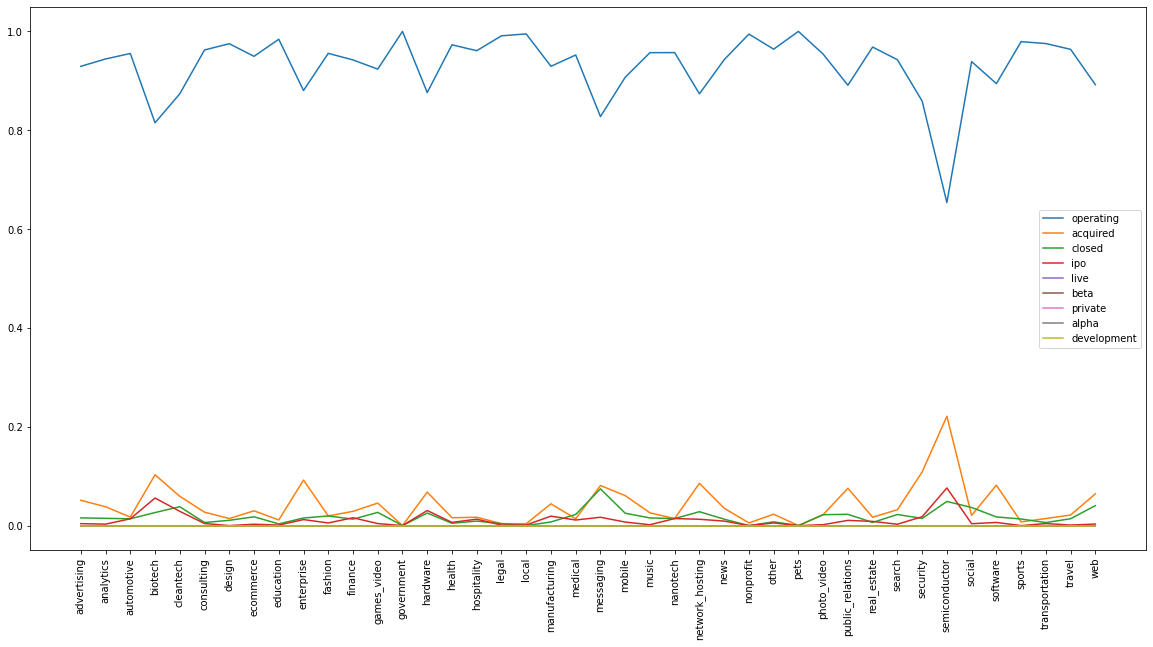

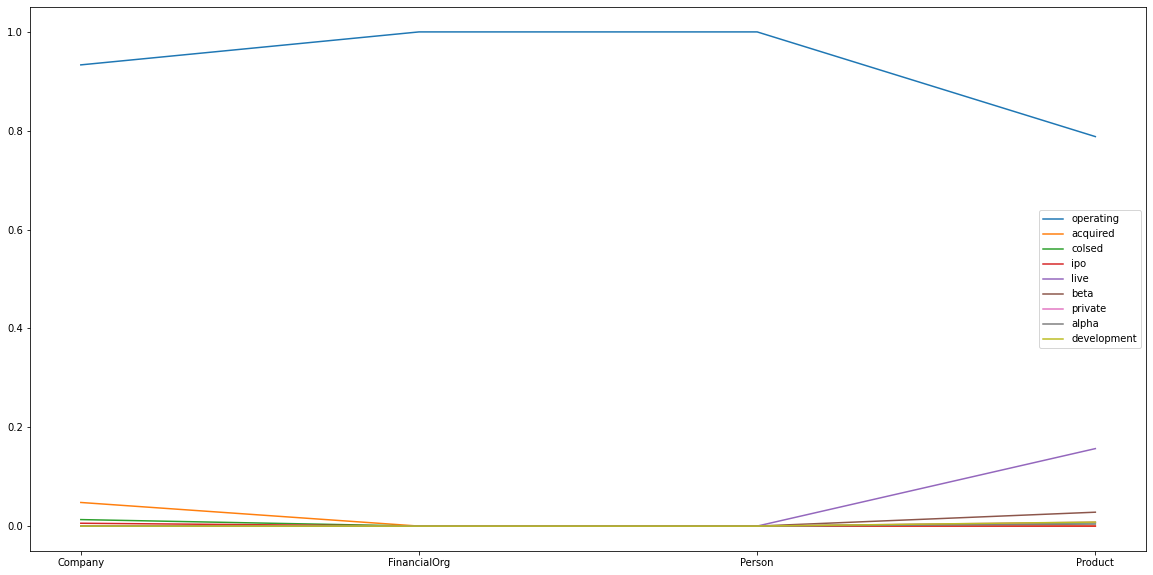

In [5]:
#OPERATING --------------------------------------------------------------------------------------------------------------------

dictCategory_operating = dict()
arrKeys_category_operating = []
arrNum_category_operating = []
for category in category_types:
    if category in objects_operating["category_code"].unique():
        dictCategory_operating[category] = len(objects_operating[objects_operating["category_code"] == category])
    else:
        dictCategory_operating[category] = 0

for key in sorted(dictCategory_operating):
    arrKeys_category_operating.append(key)
    arrNum_category_operating.append(dictCategory_operating[key] / len(objects[objects["category_code"] == key]))



dictType_operating = dict()
arrKeys_type_operating = []
arrNum_type_operating = []
for category in entity_types:
    if category in objects_operating["entity_type"].unique():
        dictType_operating[category] = len(objects_operating[objects_operating["entity_type"] == category])
    else:
         dictType_operating[category] = 0
    
for key in sorted(dictType_operating):
    arrKeys_type_operating.append(key)
    arrNum_type_operating.append(dictType_operating[key] / len(objects[objects["entity_type"] == key]))

#AQUIRED --------------------------------------------------------------------------------------------------------------

dictCategory_acquired = dict()
arrKeys_category_acquired = []
arrNum_category_acquired = []
for category in category_types:
    if category in objects_acquired["category_code"].unique():
        dictCategory_acquired[category] = len(objects_acquired[objects_acquired["category_code"] == category])
    else:
        dictCategory_acquired[category] = 0

for key in sorted(dictCategory_acquired):
    arrKeys_category_acquired.append(key)
    arrNum_category_acquired.append(dictCategory_acquired[key] / len(objects[objects["category_code"] == key]))

dictType_acquired = dict()
arrKeys_type_acquired = []
arrNum_type_acquired = []
for category in entity_types:
    if category in objects_acquired["entity_type"].unique():
        dictType_acquired[category] = len(objects_acquired[objects_acquired["entity_type"] == category])
    else:
         dictType_acquired[category] = 0
    
for key in sorted(dictType_acquired):
    arrKeys_type_acquired.append(key)
    arrNum_type_acquired.append(dictType_acquired[key] / len(objects[objects["entity_type"] == key]))

#CLOSED --------------------------------------------------------------------------------------------------------------

dictCategory_closed = dict()
arrKeys_category_closed = []
arrNum_category_closed = []
for category in category_types:
    if category in objects_closed["category_code"].unique():
        dictCategory_closed[category] = len(objects_closed[objects_closed["category_code"] == category])
    else:
        dictCategory_closed[category] = 0

for key in sorted(dictCategory_closed):
    arrKeys_category_closed.append(key)
    arrNum_category_closed.append(dictCategory_closed[key] / len(objects[objects["category_code"] == key]))

dictType_closed = dict()
arrKeys_type_closed = []
arrNum_type_closed = []
for category in entity_types:
    if category in objects_closed["entity_type"].unique():
        dictType_closed[category] = len(objects_closed[objects_closed["entity_type"] == category])
    else:
         dictType_closed[category] = 0
    
for key in sorted(dictType_closed):
    arrKeys_type_closed.append(key)
    arrNum_type_closed.append(dictType_closed[key] / len(objects[objects["entity_type"] == key]))

#IPO --------------------------------------------------------------------------------------------------------------
dictCategory_ipo = dict()
arrKeys_category_ipo = []
arrNum_category_ipo = []
for category in category_types:
    if category in objects_ipo["category_code"].unique():
        dictCategory_ipo[category] = len(objects_ipo[objects_ipo["category_code"] == category])
    else:
        dictCategory_ipo[category] = 0

for key in sorted(dictCategory_ipo):
    arrKeys_category_ipo.append(key)
    arrNum_category_ipo.append(dictCategory_ipo[key] / len(objects[objects["category_code"] == key]))

dictType_ipo = dict()
arrKeys_type_ipo = []
arrNum_type_ipo = []
for category in entity_types:
    if category in objects_ipo["entity_type"].unique():
        dictType_ipo[category] = len(objects_ipo[objects_ipo["entity_type"] == category])
    else:
         dictType_ipo[category] = 0
    
for key in sorted(dictType_ipo):
    arrKeys_type_ipo.append(key)
    arrNum_type_ipo.append(dictType_ipo[key] / len(objects[objects["entity_type"] == key]))



#LIVE --------------------------------------------------------------------------------------------------------------
dictCategory_live = dict()
arrKeys_category_live = []
arrNum_category_live = []
for category in category_types:
    if category in objects_live["category_code"].unique():
        dictCategory_live[category] = len(objects_live[objects_live["category_code"] == category])
    else:
        dictCategory_live[category] = 0

for key in sorted(dictCategory_live):
    arrKeys_category_live.append(key)
    arrNum_category_live.append(dictCategory_live[key] / len(objects[objects["category_code"] == key]))

dictType_live = dict()
arrKeys_type_live = []
arrNum_type_live = []
for category in entity_types:
    if category in objects_live["entity_type"].unique():
        dictType_live[category] = len(objects_live[objects_live["entity_type"] == category])
    else:
         dictType_live[category] = 0
    
for key in sorted(dictType_live):
    arrKeys_type_live.append(key)
    arrNum_type_live.append(dictType_live[key] / len(objects[objects["entity_type"] == key]))

#BETA --------------------------------------------------------------------------------------------------------------
dictCategory_beta = dict()
arrKeys_category_beta = []
arrNum_category_beta = []
for category in category_types:
    if category in objects_beta["category_code"].unique():
        dictCategory_beta[category] = len(objects_beta[objects_beta["category_code"] == category])
    else:
        dictCategory_beta[category] = 0

for key in sorted(dictCategory_beta):
    arrKeys_category_beta.append(key)
    arrNum_category_beta.append(dictCategory_beta[key] / len(objects[objects["category_code"] == key]))

dictType_beta = dict()
arrKeys_type_beta = []
arrNum_type_beta = []
for category in entity_types:
    if category in objects_beta["entity_type"].unique():
        dictType_beta[category] = len(objects_beta[objects_beta["entity_type"] == category])
    else:
         dictType_beta[category] = 0
    
for key in sorted(dictType_beta):
    arrKeys_type_beta.append(key)
    arrNum_type_beta.append(dictType_beta[key] / len(objects[objects["entity_type"] == key]))

#PRIVATE --------------------------------------------------------------------------------------------------------------
dictCategory_private = dict()
arrKeys_category_private = []
arrNum_category_private = []
for category in category_types:
    if category in objects_private["category_code"].unique():
        dictCategory_private[category] = len(objects_private[objects_private["category_code"] == category])
    else:
        dictCategory_private[category] = 0

for key in sorted(dictCategory_private):
    arrKeys_category_private.append(key)
    arrNum_category_private.append(dictCategory_private[key] / len(objects[objects["category_code"] == key]))

dictType_private = dict()
arrKeys_type_private = []
arrNum_type_private = []
for category in entity_types:
    if category in objects_private["entity_type"].unique():
        dictType_private[category] = len(objects_private[objects_private["entity_type"] == category])
    else:
         dictType_private[category] = 0
    
for key in sorted(dictType_private):
    arrKeys_type_private.append(key)
    arrNum_type_private.append(dictType_private[key] / len(objects[objects["entity_type"] == key]))

#ALPHA --------------------------------------------------------------------------------------------------------------
dictCategory_alpha = dict()
arrKeys_category_alpha = []
arrNum_category_alpha = []
for category in category_types:
    if category in objects_alpha["category_code"].unique():
        dictCategory_alpha[category] = len(objects_alpha[objects_alpha["category_code"] == category])
    else:
        dictCategory_alpha[category] = 0

for key in sorted(dictCategory_alpha):
    arrKeys_category_alpha.append(key)
    arrNum_category_alpha.append(dictCategory_alpha[key] / len(objects[objects["category_code"] == key]))

dictType_alpha = dict()
arrKeys_type_alpha = []
arrNum_type_alpha = []
for category in entity_types:
    if category in objects_alpha["entity_type"].unique():
        dictType_alpha[category] = len(objects_alpha[objects_alpha["entity_type"] == category])
    else:
         dictType_alpha[category] = 0
    
for key in sorted(dictType_alpha):
    arrKeys_type_alpha.append(key)
    arrNum_type_alpha.append(dictType_alpha[key] / len(objects[objects["entity_type"] == key]))

#DEVELOPMENT --------------------------------------------------------------------------------------------------------------
dictCategory_development = dict()
arrKeys_category_development = []
arrNum_category_development = []
for category in category_types:
    if category in objects_development["category_code"].unique():
        dictCategory_development[category] = len(objects_development[objects_development["category_code"] == category])
    else:
        dictCategory_development[category] = 0

for key in sorted(dictCategory_development):
    arrKeys_category_development.append(key)
    arrNum_category_development.append(dictCategory_development[key] / len(objects[objects["category_code"] == key]))

dictType_development = dict()
arrKeys_type_development = []
arrNum_type_development = []
for category in entity_types:
    if category in objects_development["entity_type"].unique():
        dictType_development[category] = len(objects_development[objects_development["entity_type"] == category])
    else:
         dictType_development[category] = 0
    
for key in sorted(dictType_development):
    arrKeys_type_development.append(key)
    arrNum_type_development.append(dictType_development[key] / len(objects[objects["entity_type"] == key]))


pyplot.figure(figsize=(20,10))
pyplot.plot(arrKeys_category_operating, arrNum_category_operating, label="operating")
pyplot.plot(arrKeys_category_acquired, arrNum_category_acquired, label="acquired")
pyplot.plot(arrKeys_category_closed, arrNum_category_closed, label="closed")
pyplot.plot(arrKeys_category_ipo, arrNum_category_ipo, label="ipo")
pyplot.plot(arrKeys_category_live, arrNum_category_live, label="live")
pyplot.plot(arrKeys_category_beta, arrNum_category_beta, label="beta")
pyplot.plot(arrKeys_category_private, arrNum_category_private, label="private")
pyplot.plot(arrKeys_category_alpha, arrNum_category_alpha, label="alpha")
pyplot.plot(arrKeys_category_development, arrNum_category_development, label="development")
pyplot.xticks(rotation=90)
pyplot.legend()

pyplot.figure(figsize=(20,10))
pyplot.plot(arrKeys_type_operating, arrNum_type_operating, label="operating")
pyplot.plot(arrKeys_type_acquired, arrNum_type_acquired, label="acquired")
pyplot.plot(arrKeys_type_closed, arrNum_type_closed, label="colsed")
pyplot.plot(arrKeys_type_ipo, arrNum_type_ipo, label="ipo")
pyplot.plot(arrKeys_type_live, arrNum_type_live, label="live")
pyplot.plot(arrKeys_type_beta, arrNum_type_beta, label="beta")
pyplot.plot(arrKeys_type_private, arrNum_type_private, label="private")
pyplot.plot(arrKeys_type_alpha, arrNum_type_alpha, label="alpha")
pyplot.plot(arrKeys_type_development, arrNum_type_development, label="development")
pyplot.legend()